# Análisis mediante scraping web de las ofertas de alquiler del portal Idealista para el Área Metropolitana de Granada

# Lectura del archivo


In [ ]:
import pandas as pd
from google.colab import files

# Subir archivo
uploaded = files.upload()

# Intentar leer el archivo con diferentes separadores y codificaciones
file_name = list(uploaded.keys())[0]  # Get the actual uploaded filename

# Primero, intenta leer el archivo con la codificación UTF-8
try:
    df = pd.read_csv(file_name, sep=';', engine='python', on_bad_lines='skip', encoding='utf-8')
except UnicodeDecodeError:
    print("Error leyendo con codificación UTF-8. Intentando con 'latin-1' ...")
    # Si falla con UTF-8, prueba con 'latin-1'
    try:
        df = pd.read_csv(file_name, sep=';', engine='python', on_bad_lines='skip', encoding='latin-1')
    except UnicodeDecodeError:
        print("Error leyendo con codificación 'latin-1'. Intentando con 'ISO-8859-1' ...")
        # Si falla con 'latin-1', prueba con 'ISO-8859-1'
        df = pd.read_csv(file_name, sep=';', engine='python', on_bad_lines='skip', encoding='ISO-8859-1')
    except Exception as e:
        print("Error al leer el archivo:", e)
except Exception as e:
    print("Error al leer el archivo:", e)


df.head()

Saving 19.04.2025 - 001.csv.xls to 19.04.2025 - 001.csv.xls


Id del anuncio                             Título Tipo de inmueble  \
0       106722350             Piso en calle Parra, 5             Piso   
1       107414996              Piso en calle Mirasol             Piso   
2       107961015             Piso en calle Silencio             Piso   
3       105402208           Ático en calle Recogidas            Ático   
4       107960136  Ático en calle Maestro Lecuona, 2            Ático   

                                         Descripción  \
0  Bonito piso recién reformado salón, cocina, ba...   
1  PISO CON TERRAZA DE 25 M2 - 3 DORMITORIOS EN G...   
2  Oportunidad. Disponible en alquiler para estud...   
3  **¡Oportunidad Única en el Corazón de la Ciuda...   
4  Piso con diseño confortable. El suelo con tari...   

                  Dirección                                  Barrio Distrito  \
0            calle Parra, 5                                       -        -   
1             calle Mirasol  Carrera de la Virgen - Paseo del Salón  Realejo   
2            calle Silencio                                Catedral   Centro   
3           calle Recogidas                               Recogidas   Centro   
4  calle Maestro Lecuona, 2                                       -  Figares   

   Municipio  Precio Precio antes de rebaja  Euros/m2  Habitaciones  \
0  Chauchina     500                      -         6             2   
1    Granada    1290                      -        13             3   
2    Granada    1240                      -        12             4   
3    Granada    1500                      -         7             3   
4    Granada    1080                      -        12             2   

  Tipo de vendedor  Metros cuadrados construidos Planta  Baños    Longitud  \
0       Particular                            80      1      1  -3,7695311   
1      Profesional                           100      3      1  -3,5969911   
2      Profesional                           105      2      1  -3,6020683   
3      Profesional                           220      -      2  -3,6005599   
4       Particular                            90      5      1  -3,6031523   

  Ascensor (Sí/No) Aire acondicionado (Sí/No)     Latitud  
0               No                         No  37,2032084  
1               No                         No   37,169924  
2               No                         No  37,1753868  
3               Sí                         No  37,1718328  
4               Sí                         Sí  37,1663115

(1565, 20)


Id del anuncio                             Título Tipo de inmueble  \
0       106722350             Piso en calle Parra, 5             Piso   
1       107414996              Piso en calle Mirasol             Piso   
2       107961015             Piso en calle Silencio             Piso   
3       105402208           Ático en calle Recogidas            Ático   
4       107960136  Ático en calle Maestro Lecuona, 2            Ático   

                                         Descripción  \
0  Bonito piso recién reformado salón, cocina, ba...   
1  PISO CON TERRAZA DE 25 M2 - 3 DORMITORIOS EN G...   
2  Oportunidad. Disponible en alquiler para estud...   
3  **¡Oportunidad Única en el Corazón de la Ciuda...   
4  Piso con diseño confortable. El suelo con tari...   

                  Dirección                                  Barrio Distrito  \
0            calle Parra, 5                                       -        -   
1             calle Mirasol  Carrera de la Virgen - Paseo del Salón  Realejo   
2            calle Silencio                                Catedral   Centro   
3           calle Recogidas                               Recogidas   Centro   
4  calle Maestro Lecuona, 2                                       -  Figares   

   Municipio  Precio Precio antes de rebaja  Euros/m2  Habitaciones  \
0  Chauchina     500                      -         6             2   
1    Granada    1290                      -        13             3   
2    Granada    1240                      -        12             4   
3    Granada    1500                      -         7             3   
4    Granada    1080                      -        12             2   

  Tipo de vendedor  Metros cuadrados construidos Planta  Baños    Longitud  \
0       Particular                            80      1      1  -3,7695311   
1      Profesional                           100      3      1  -3,5969911   
2      Profesional                           105      2      1  -3,6020683   
3      Profesional                           220      -      2  -3,6005599   
4       Particular                            90      5      1  -3,6031523   

  Ascensor (Sí/No) Aire acondicionado (Sí/No)     Latitud  
0               No                         No  37,2032084  
1               No                         No   37,169924  
2               No                         No  37,1753868  
3               Sí                         No  37,1718328  
4               Sí                         Sí  37,1663115

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Id del anuncio                1565 non-null   int64 
 1   Título                        1565 non-null   object
 2   Tipo de inmueble              1565 non-null   object
 3   Descripción                   1565 non-null   object
 4   Dirección                     1565 non-null   object
 5   Barrio                        1565 non-null   object
 6   Distrito                      1565 non-null   object
 7   Municipio                     1565 non-null   object
 8   Precio                        1565 non-null   int64 
 9   Precio antes de rebaja        1565 non-null   object
 10  Euros/m2                      1565 non-null   int64 
 11  Habitaciones                  1565 non-null   int64 
 12  Tipo de vendedor              1565 non-null   object
 13  Metros cuadrados c

None

Id del anuncio Título Tipo de inmueble  \
count     1.565000e+03   1565             1565   
unique             NaN    880                6   
top                NaN   Piso             Piso   
freq               NaN    329             1301   
mean      1.022845e+08    NaN              NaN   
std       1.485264e+07    NaN              NaN   
min       7.601980e+05    NaN              NaN   
25%       1.037148e+08    NaN              NaN   
50%       1.070567e+08    NaN              NaN   
75%       1.077786e+08    NaN              NaN   
max       1.079610e+08    NaN              NaN   

                                              Descripción  \
count                                                1565   
unique                                               1372   
top     ¡Gratis el primer mes de renta! SIN COMISIONES...   
freq                                                   13   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                     Dirección Barrio Distrito Municipio       Precio  \
count                     1565   1565     1565      1565  1565.000000   
unique                     903     21       40        30          NaN   
top     Barrio Ronda - Arabial      -   Centro   Granada          NaN   
freq                        31    817      262      1334          NaN   
mean                       NaN    NaN      NaN       NaN   982.223003   
std                        NaN    NaN      NaN       NaN   356.159054   
min                        NaN    NaN      NaN       NaN   340.000000   
25%                        NaN    NaN      NaN       NaN   750.000000   
50%                        NaN    NaN      NaN       NaN   900.000000   
75%                        NaN    NaN      NaN       NaN  1200.000000   
max                        NaN    NaN      NaN       NaN  4800.000000   

       Precio antes de rebaja     Euros/m2  Habitaciones Tipo de vendedor  \
count                    1565  1565.000000   1565.000000             1565   
unique                     20          NaN           NaN                2   
top                         -          NaN           NaN      Profesional   
freq                     1503          NaN           NaN             1221   
mean                      NaN    11.271565      2.651118              NaN   
std                       NaN     5.125259      1.300086              NaN   
min                       NaN     2.000000      0.000000              NaN   
25%                       NaN     9.000000      2.000000              NaN   
50%                       NaN    11.000000      3.000000              NaN   
75%                       NaN    13.000000      4.000000              NaN   
max                       NaN   120.000000     10.000000              NaN   

        Metros cuadrados construidos Planta        Baños    Longitud  \
count                    1565.000000   1565  1565.000000        1565   
unique                           NaN     15          NaN        1364   
top                              NaN      1          NaN  -3,6197274   
freq                             NaN    331          NaN          10   
mean                       96.882428    NaN     1.468371         NaN   
std                        52.780855    NaN     0.597140         NaN   
min                        19.000000    NaN     1.000000         NaN   
25%                        70.000000    NaN     1.000000         NaN   
50%                        90.000000    NaN     1.000000         NaN   
75%                       112.000000    NaN     2.000000         NaN   
max                       900.000000    NaN     5.000000         NaN   

       

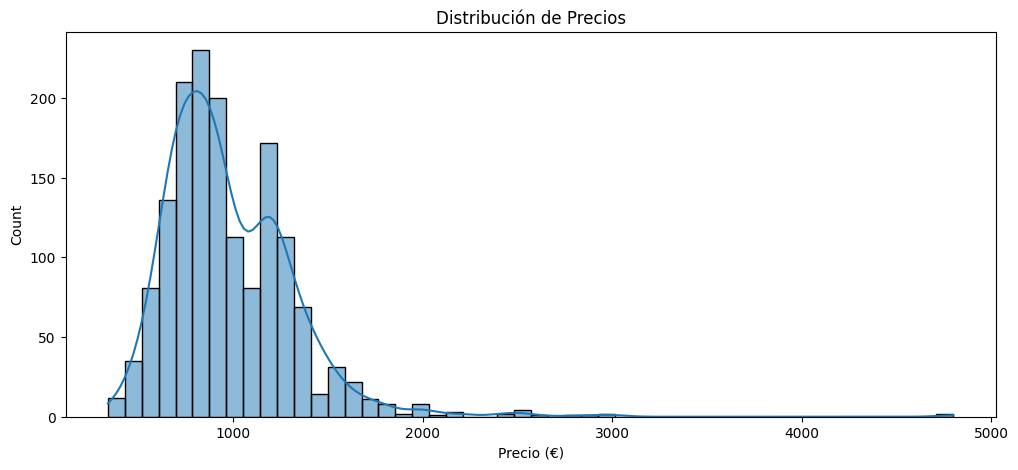

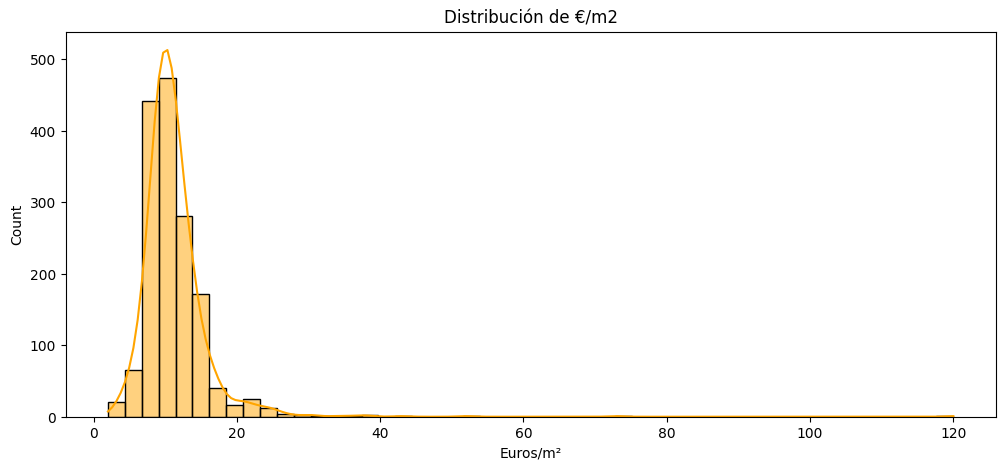

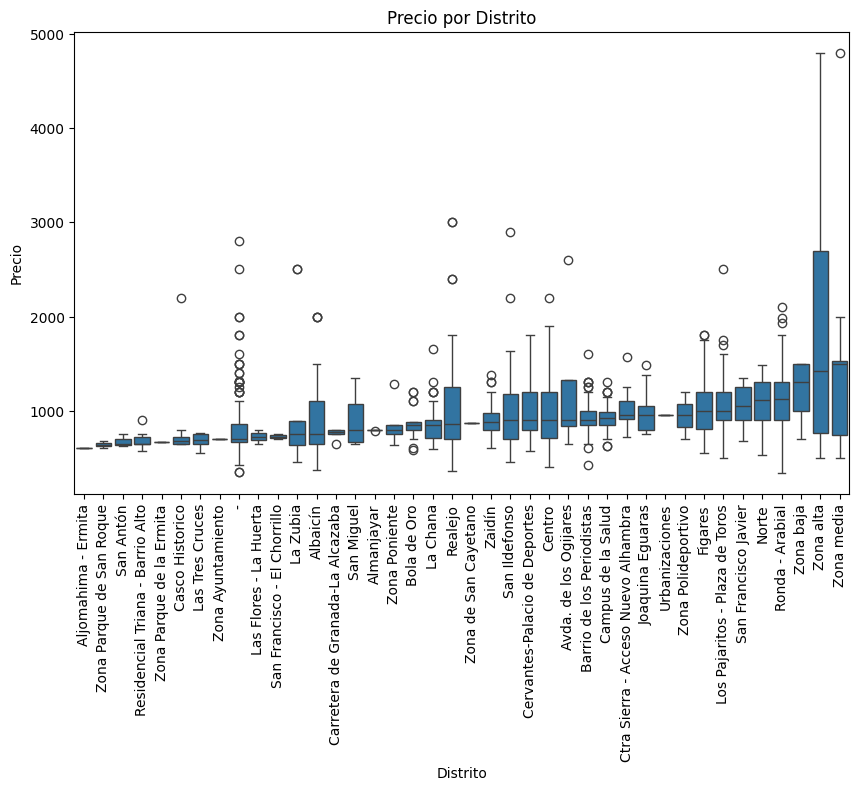

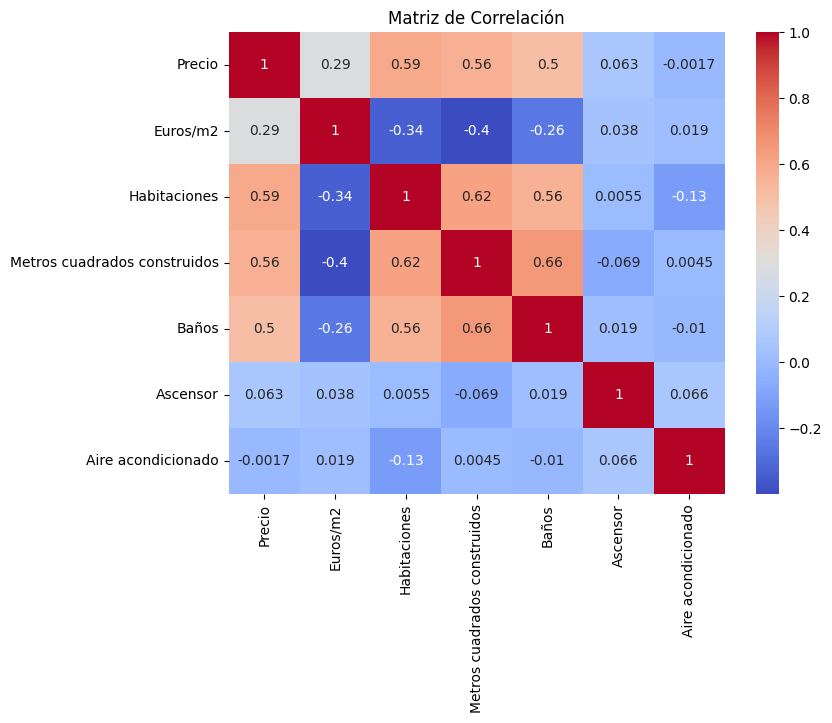

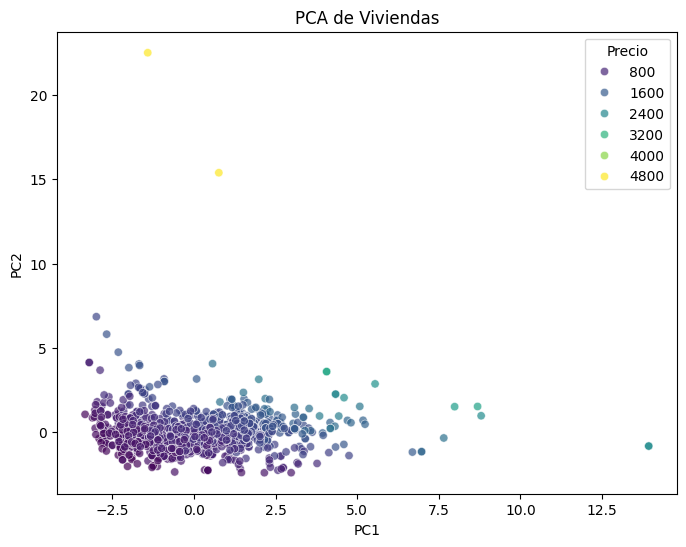

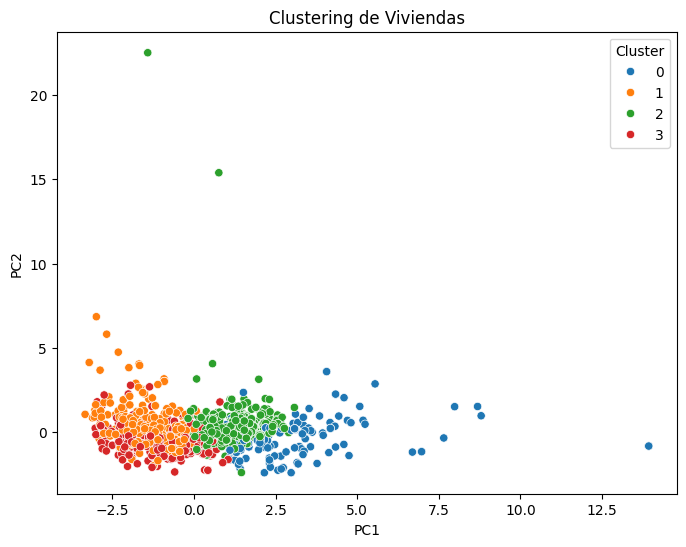

R² Train: 0.465596014653301
R² Test: 0.298991173857417
Coeficientes de regresión:


Metros cuadrados construidos      2.049796
Habitaciones                    115.309286
Ascensor                         50.002701
Aire acondicionado               35.412072
dtype: float64

Análisis completado y resultados guardados.


In [ ]:
# Instalación de bibliotecas necesarias
!pip install pandas numpy seaborn matplotlib plotly folium scikit-learn

# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 2️⃣ Inspección inicial
print(df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

# 3️⃣ Limpieza y preprocesamiento
# Convertir columnas numéricas
num_cols = ['Precio','Precio antes de rebaja','Euros/m2','Habitaciones',
            'Metros cuadrados construidos','Planta','Baños','Longitud']

# Ensure all columns in num_cols are present in the DataFrame and are numeric
num_cols = [col for col in num_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Convertir Sí/No a 1/0
df['Ascensor'] = df['Ascensor (Sí/No)'].map({'Sí':1,'No':0})
df['Aire acondicionado'] = df['Aire acondicionado (Sí/No)'].map({'Sí':1,'No':0})

imp_cat = SimpleImputer(strategy='constant', fill_value='Desconocido')
df['Barrio'] = imp_cat.fit_transform(df['Barrio'].values.reshape(-1, 1))[:, 0]
df['Distrito'] = imp_cat.fit_transform(df['Distrito'].values.reshape(-1, 1))[:, 0]
df['Municipio'] = imp_cat.fit_transform(df['Municipio'].values.reshape(-1, 1))[:, 0]

# 4️⃣ Análisis Univariado
plt.figure(figsize=(12,5))
sns.histplot(df['Precio'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio (€)')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Euros/m2'], bins=50, kde=True, color='orange')
plt.title('Distribución de €/m2')
plt.xlabel('Euros/m²')
plt.show()

# 5️⃣ Análisis Categórico
import plotly.express as px

# Assuming your DataFrame is called 'df'

# Calculate the counts of each unique value in the 'Municipio' column
municipio_counts = df['Municipio'].value_counts().reset_index()

# Rename the columns for clarity
municipio_counts.columns = ['Municipio', 'Count']

# Create the bar chart
fig = px.bar(municipio_counts,
             x='Municipio',
             y='Count',
             title='Número de anuncios por Municipio')

# Show the chart
fig.show()

# 6️⃣ Boxplot de Precio por Distrito
plt.figure(figsize=(10,6))
order = df.groupby('Distrito')['Precio'].median().sort_values().index
sns.boxplot(data=df, x='Distrito', y='Precio', order=order)
plt.xticks(rotation=90)
plt.title('Precio por Distrito')
plt.show()

# 7️⃣ Correlación y Heatmap
corr = df[num_cols + ['Ascensor','Aire acondicionado']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 9️⃣ Análisis Multivariante: PCA
features = df[num_cols + ['Ascensor','Aire acondicionado']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = coords[:,0], coords[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Precio', palette='viridis', alpha=0.7)
plt.title('PCA de Viviendas')
plt.show()

# 1️⃣0️⃣ Clustering con KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Clustering de Viviendas')
plt.show()

# 1️⃣1️⃣ Regresión Lineal (Precio ~ características)
X = df[['Metros cuadrados construidos','Habitaciones','Ascensor','Aire acondicionado']]
y = df['Precio']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("R² Train:", lr.score(X_train, y_train))
print("R² Test:", lr.score(X_test, y_test))
coeffs = pd.Series(lr.coef_, index=X.columns)
print("Coeficientes de regresión:")
display(coeffs)

# 1️⃣2️⃣ Guardar resultados
df.to_csv('idealista_eda_results.csv', index=False)
print("Análisis completado y resultados guardados.")



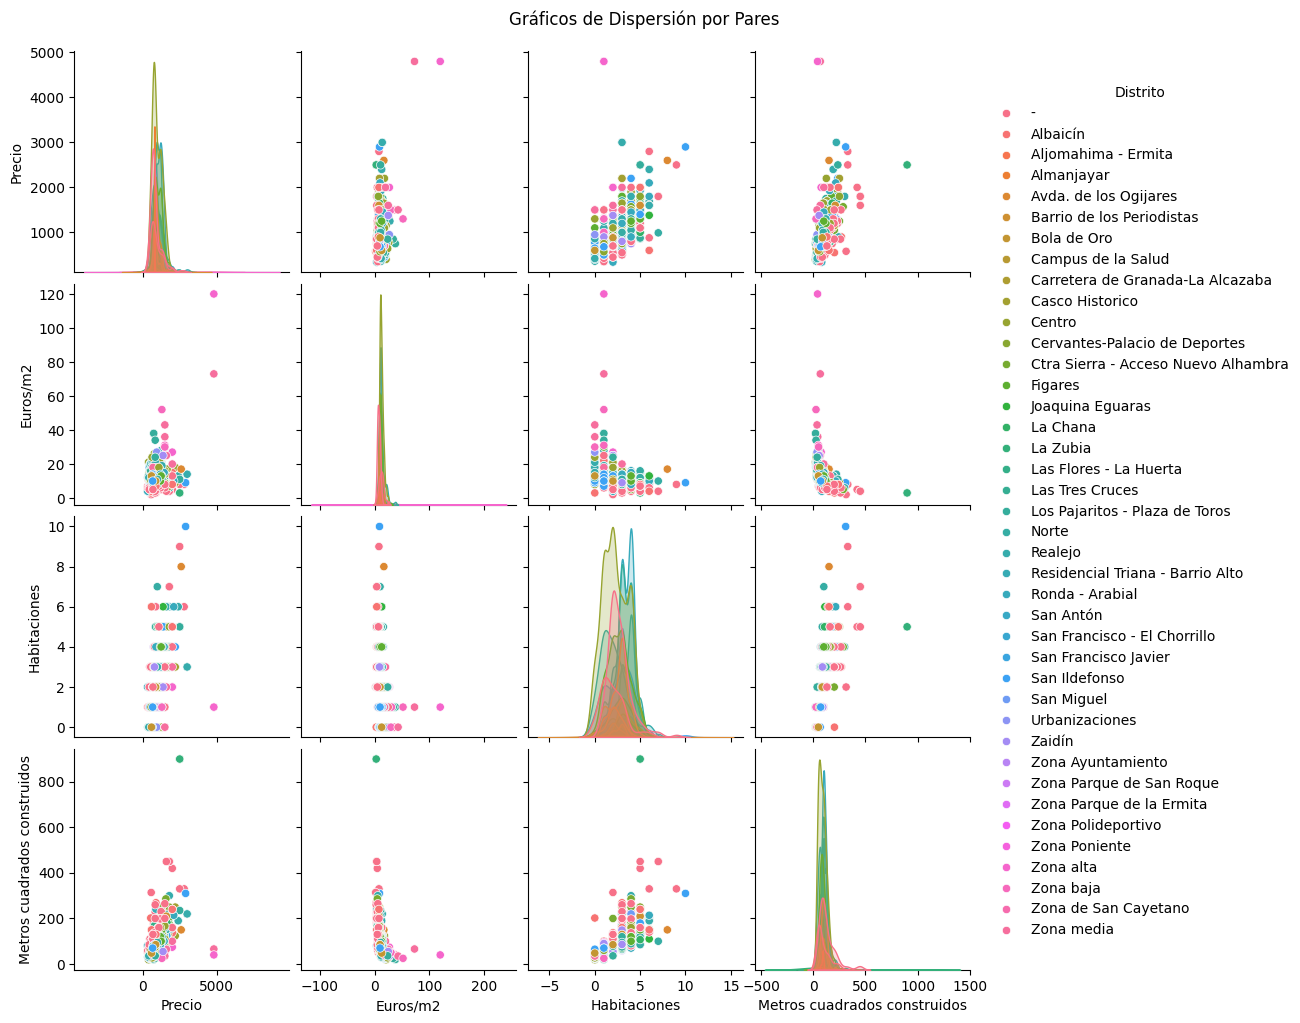

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas para los gráficos de dispersión
num_cols = ['Precio', 'Euros/m2', 'Habitaciones', 'Metros cuadrados construidos']

# Verifica si la columna 'Distrito' existe en el DataFrame
if 'Distrito' in df.columns:
    # Convierte 'Distrito' a una variable categórica
    df['Distrito'] = df['Distrito'].astype('category')

    # Crea los gráficos de dispersión por pares
    sns.pairplot(df[num_cols + ['Distrito']], kind='scatter', diag_kind='kde', hue='Distrito')  # Include 'Distrito' in the data for pairplot
    plt.suptitle('Gráficos de Dispersión por Pares', y=1.02)
    plt.show()
else:
    print("La columna 'Distrito' no se encuentra en el DataFrame. Por favor, revisa el nombre de la columna o si está presente en tus datos.")

<ipython-input-10-cacf4126cf65>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




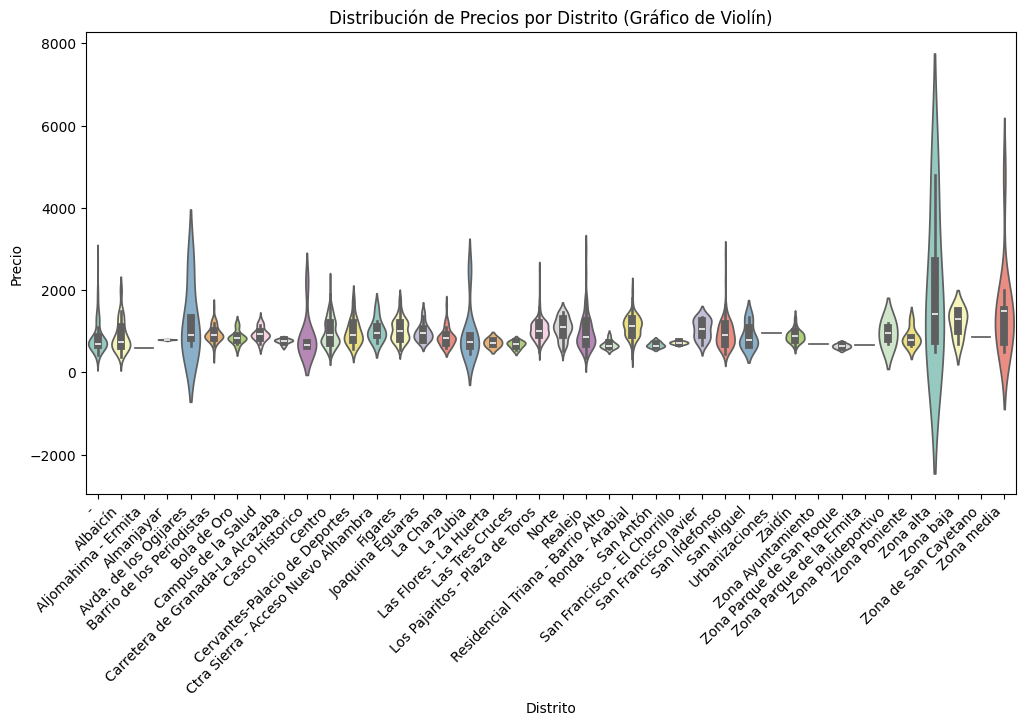

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un gráfico de violín para 'Precio' por 'Distrito'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Distrito', y='Precio', data=df, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Distrito (Gráfico de Violín)')
plt.show()

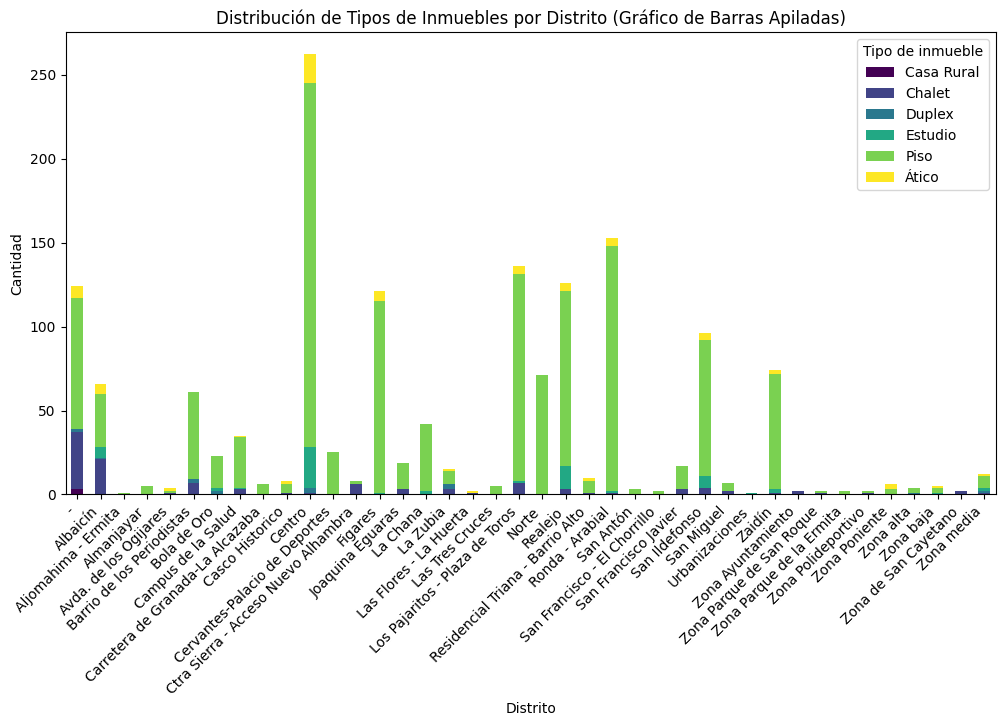

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea una tabla de contingencia para 'Distrito' y 'Tipo de inmueble'
contingency_table = pd.crosstab(df['Distrito'], df['Tipo de inmueble'])

# Crea un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Tipos de Inmuebles por Distrito (Gráfico de Barras Apiladas)')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de inmueble')
plt.show()

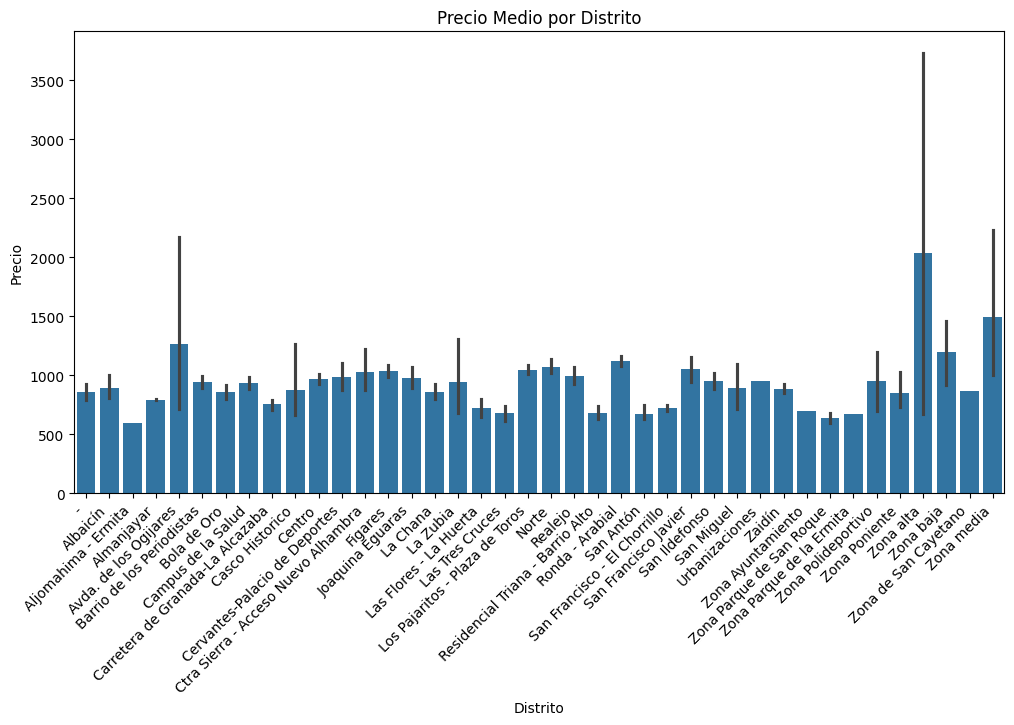

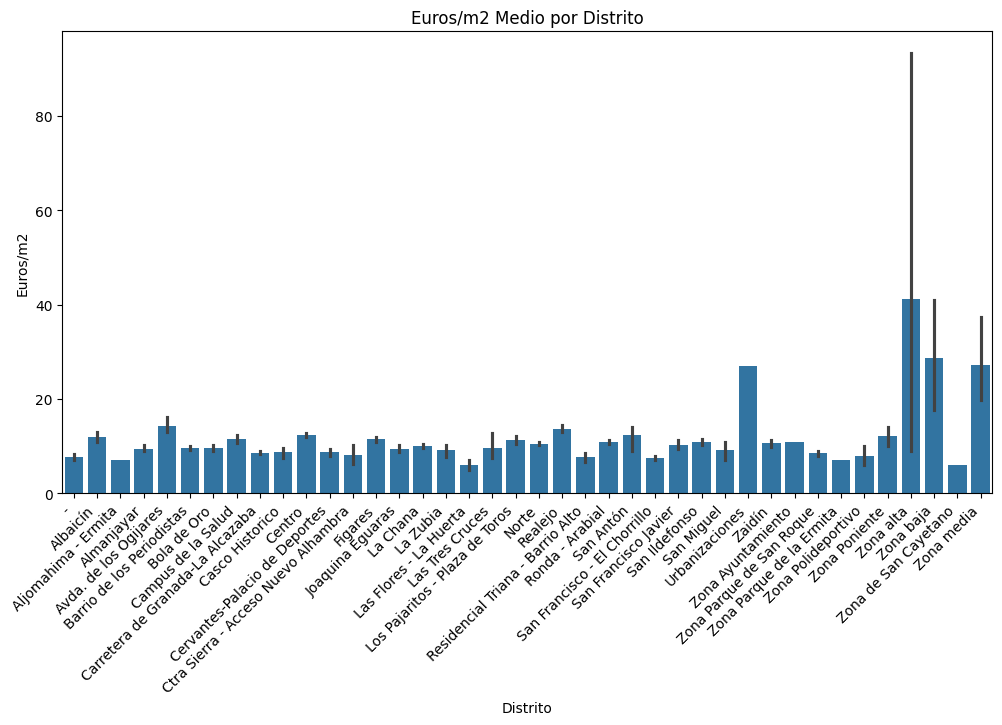

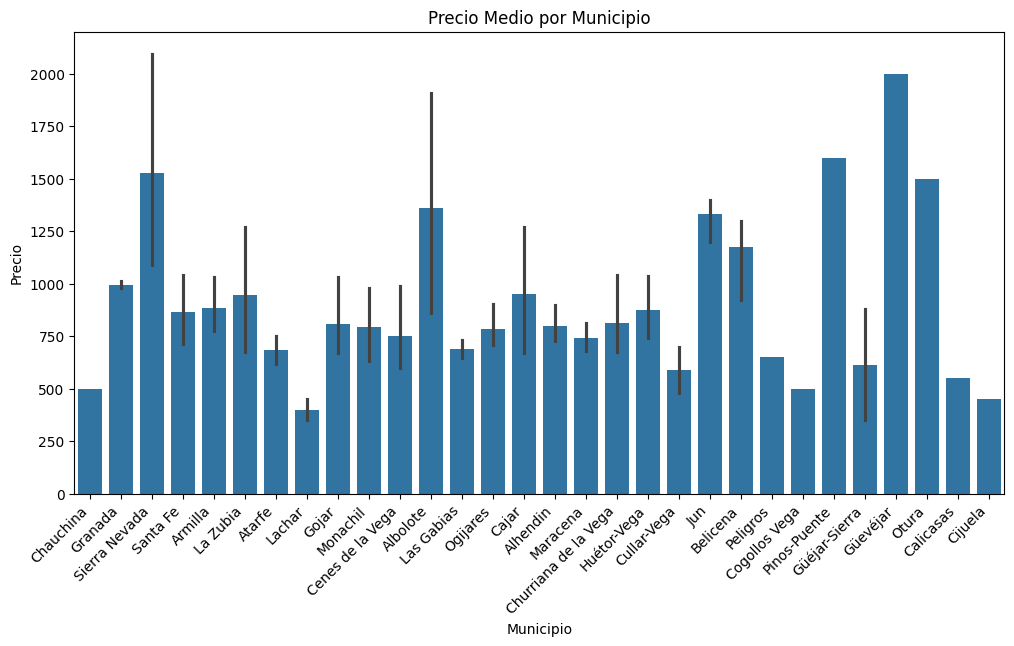

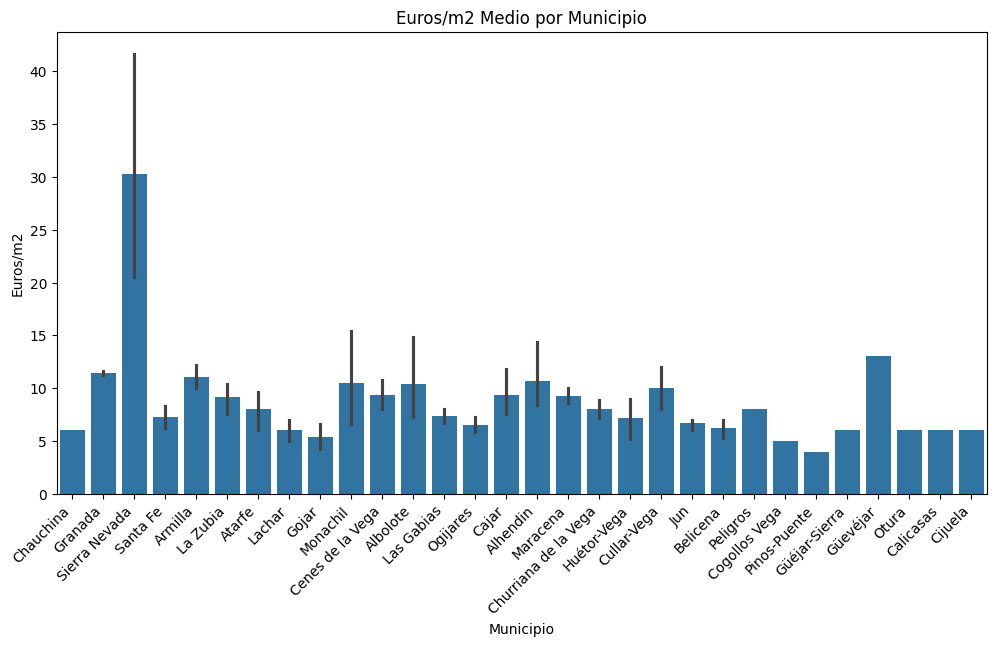

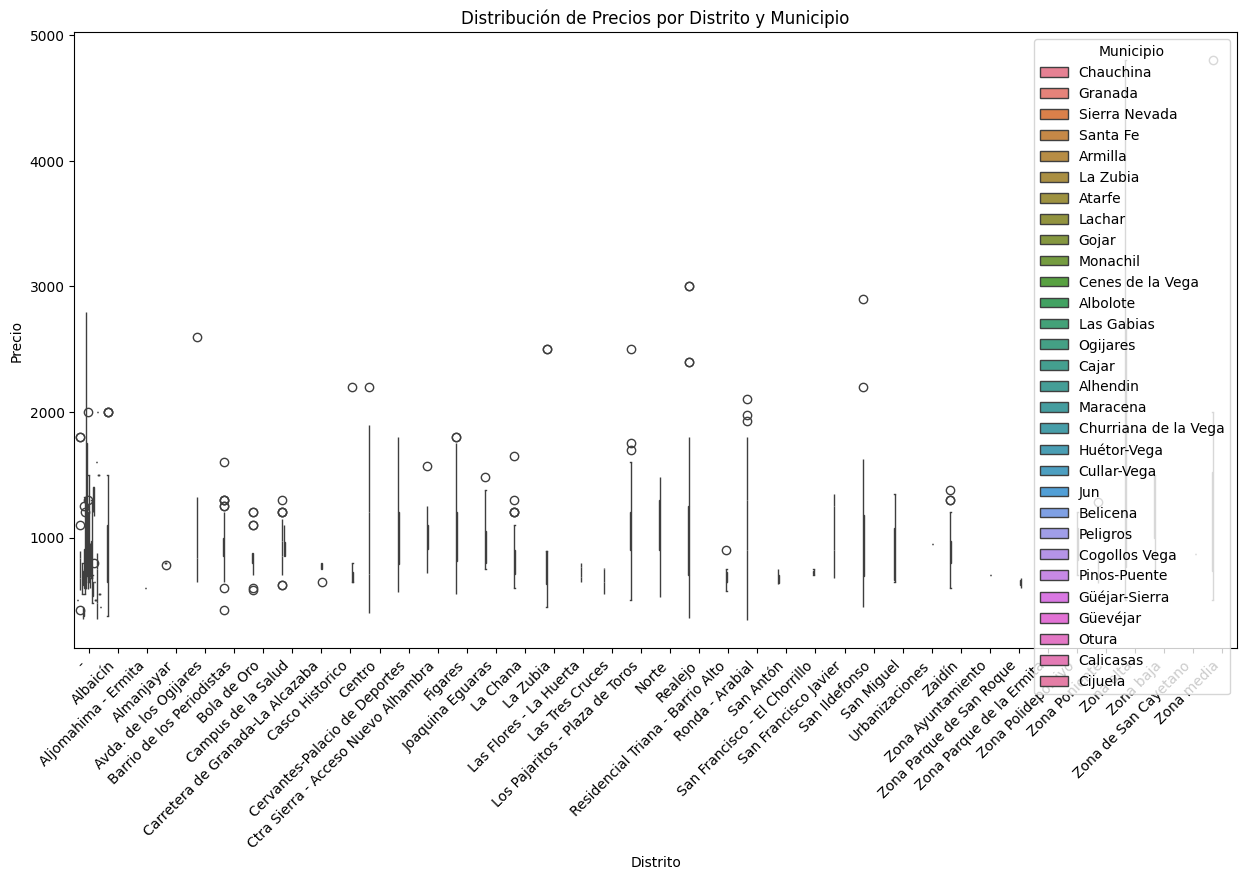

In [ ]:
!pip install pandas numpy seaborn matplotlib plotly folium scikit-learn

# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Análisis adicional de Precio y Euros/m2 por Distrito y Municipio

# 1. Precio medio por Distrito
plt.figure(figsize=(12, 6))
sns.barplot(x='Distrito', y='Precio', data=df, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Precio Medio por Distrito')
plt.show()

# 2. Euros/m2 medio por Distrito
plt.figure(figsize=(12, 6))
sns.barplot(x='Distrito', y='Euros/m2', data=df, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Euros/m2 Medio por Distrito')
plt.show()

# 3. Precio medio por Municipio
plt.figure(figsize=(12, 6))
sns.barplot(x='Municipio', y='Precio', data=df, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Precio Medio por Municipio')
plt.show()

# 4. Euros/m2 medio por Municipio
plt.figure(figsize=(12, 6))
sns.barplot(x='Municipio', y='Euros/m2', data=df, estimator=np.mean)
plt.xticks(rotation=45, ha='right')
plt.title('Euros/m2 Medio por Municipio')
plt.show()

# 5. Boxplots de Precio por Distrito y Municipio (combinados)
plt.figure(figsize=(15, 8))
sns.boxplot(x='Distrito', y='Precio', hue='Municipio', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Distrito y Municipio')
plt.legend(title='Municipio')
plt.show()


<ipython-input-18-270dc8945fb8>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-270dc8945fb8>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



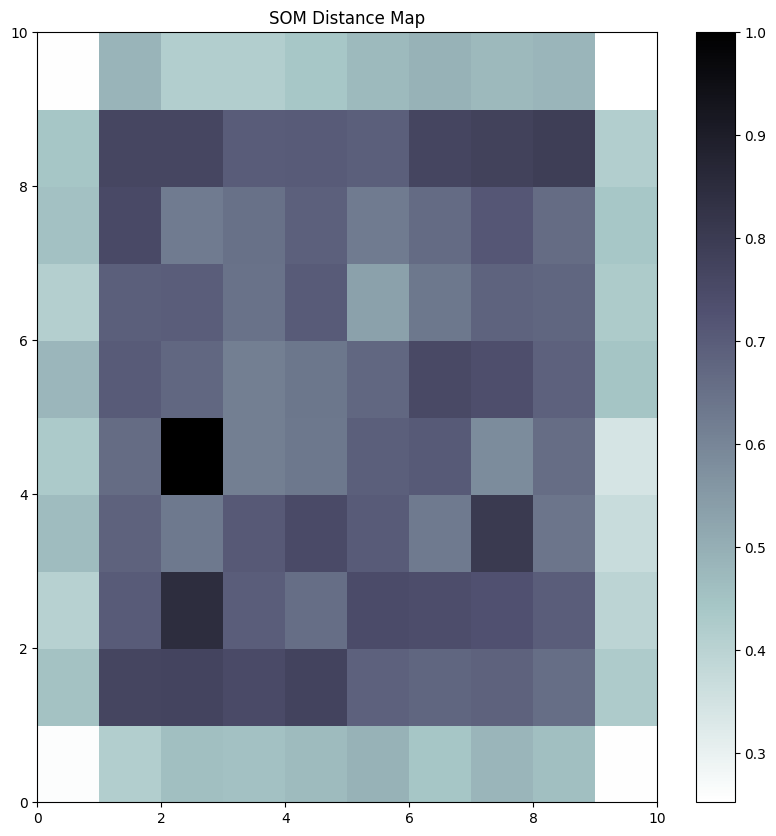

Average price per SOM cluster:
SOM_Cluster
24.0     985.800745
29.0    1415.000000
39.0    4800.000000
56.0     801.706349
60.0    1023.321995
90.0     901.137931
Name: Precio, dtype: float64


In [ ]:
!pip install minisom pandas numpy seaborn matplotlib

import pandas as pd
import numpy as np
from minisom import MiniSom
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Select relevant numerical features for the SOM
som_features = ['Precio', 'Euros/m2', 'Habitaciones', 'Metros cuadrados construidos',
                'Planta', 'Baños', 'Ascensor', 'Aire acondicionado']

# 2. Prepare the data for the SOM
# a. Select only the features you want to use for clustering
X_som = df[som_features]

# b. Handle non-numeric values in 'Precio' and 'Euros/m2'
X_som['Precio'] = pd.to_numeric(X_som['Precio'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
X_som['Euros/m2'] = pd.to_numeric(X_som['Euros/m2'], errors='coerce')

# c. Handle missing values - impute or drop
X_som = X_som.dropna()  # Drop rows with missing values
# Or you could use imputation:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # Or another strategy
# X_som = imputer.fit_transform(X_som)

# d. Ensure all columns are numeric
X_som = X_som.astype(float)

# e. Scale the data
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler here
scaler = MinMaxScaler() # or StandardScaler
X_som_scaled = scaler.fit_transform(X_som)

# 3. Create and train the SOM
# a. Define SOM dimensions (grid size) - adjust these as needed
som_dim = (10, 10)  # Example: 10x10 grid

# b. Initialize the SOM
som = MiniSom(som_dim[0], som_dim[1], X_som_scaled.shape[1], sigma=0.3, learning_rate=0.5)

# c. Train the SOM
som.train_random(X_som_scaled, 1000)  # Adjust the number of iterations as needed

# 4. Visualize the SOM
# a. Get the cluster assignments for each data point
cluster_labels = [som.winner(x)[0] * som_dim[1] + som.winner(x)[1] for x in X_som_scaled]

# Assign the cluster labels to X_som DataFrame
X_som['SOM_Cluster'] = cluster_labels # Assign to X_som, not X_som_processed

# Merge the 'SOM_Cluster' column back into the original DataFrame (df)
df = pd.merge(df, X_som[['SOM_Cluster']], left_index=True, right_index=True, how='left') # Merge X_som, not X_som_processed


# b. Create a heatmap to visualize the clusters
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Distance map visualization
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()


# 5. Further analysis with the SOM clusters (example: average prices per cluster)
cluster_means = df.groupby('SOM_Cluster')['Precio'].mean()
print("Average price per SOM cluster:")
print(cluster_means)

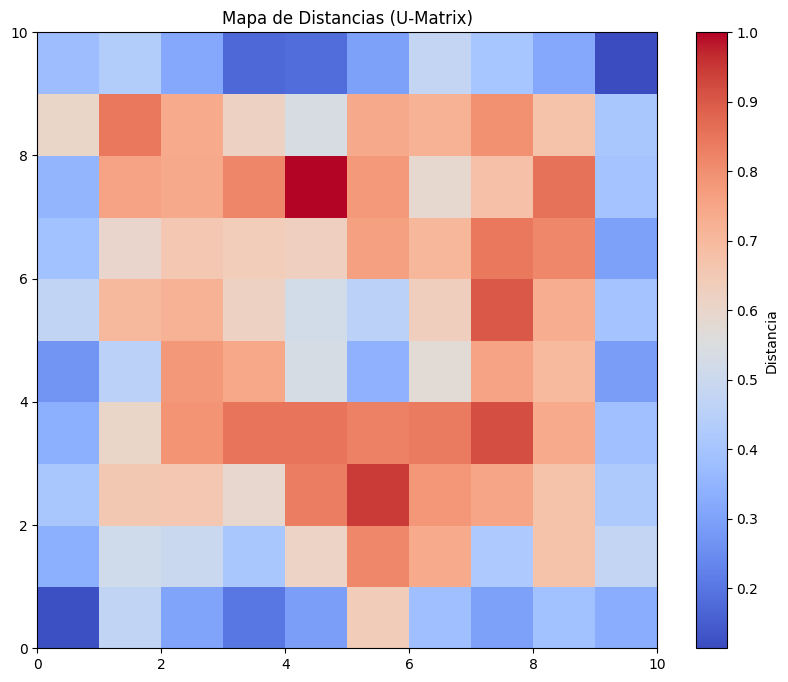

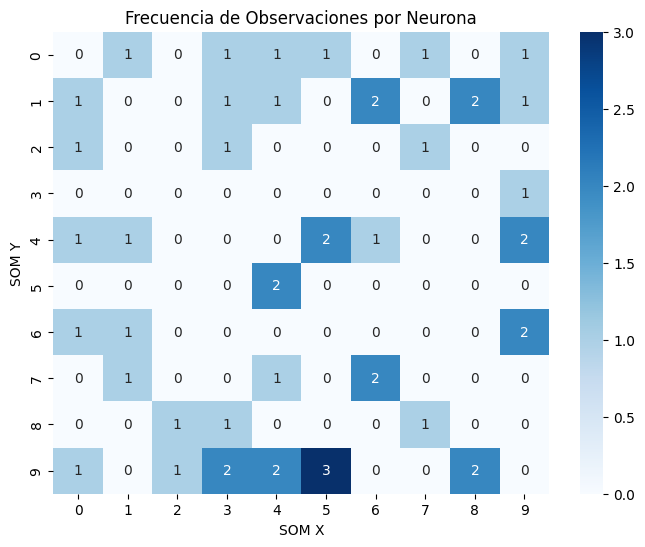

In [ ]:
# Reinstalar dependencias tras el reinicio del entorno
!pip install minisom pandas openpyxl matplotlib seaborn scikit-learn

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler



# Filtrar columnas numéricas válidas para SOM, excluyendo las que tienen tipos mixtos
cols_numericas = df.select_dtypes(include=['number']).columns # <-- Changed here
# Excluir columnas problemáticas como 'Longitud'
cols_numericas = cols_numericas[~cols_numericas.isin(['Longitud'])]  # <-- Added this line
df_numerico = df[cols_numericas].dropna()


# Normalizar los datos
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numerico)

# Inicializar y entrenar SOM
som_x, som_y = 10, 10
som = MiniSom(x=som_x, y=som_y, input_len=df_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(df_scaled)
som.train_random(df_scaled, 1000)

# Visualizar U-Matrix
plt.figure(figsize=(10, 8))
plt.title('Mapa de Distancias (U-Matrix)')
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar(label='Distancia')
plt.show()

# Visualizar densidad por nodo
win_map = som.win_map(df_scaled)
frequencies = np.zeros((som_x, som_y))
for x in range(som_x):
    for y in range(som_y):
        frequencies[x, y] = len(win_map.get((x, y), []))

plt.figure(figsize=(8, 6))
sns.heatmap(frequencies.T, cmap='Blues', annot=True, fmt='.0f')
plt.title("Frecuencia de Observaciones por Neurona")
plt.xlabel("SOM X")
plt.ylabel("SOM Y")
plt.show()

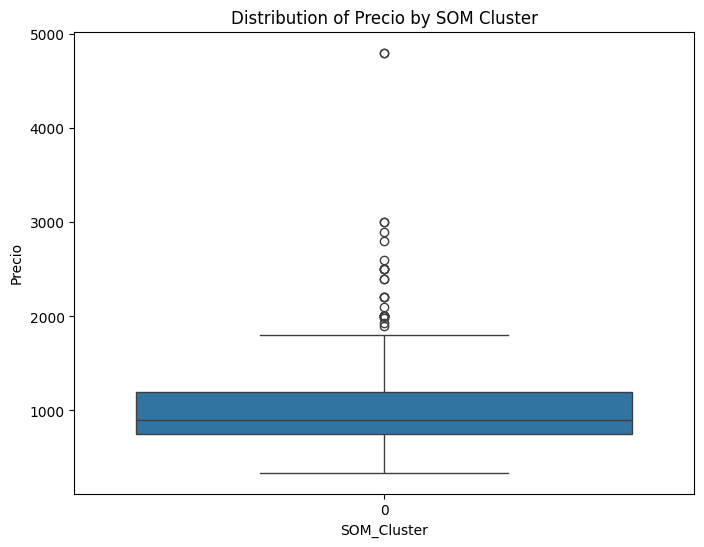

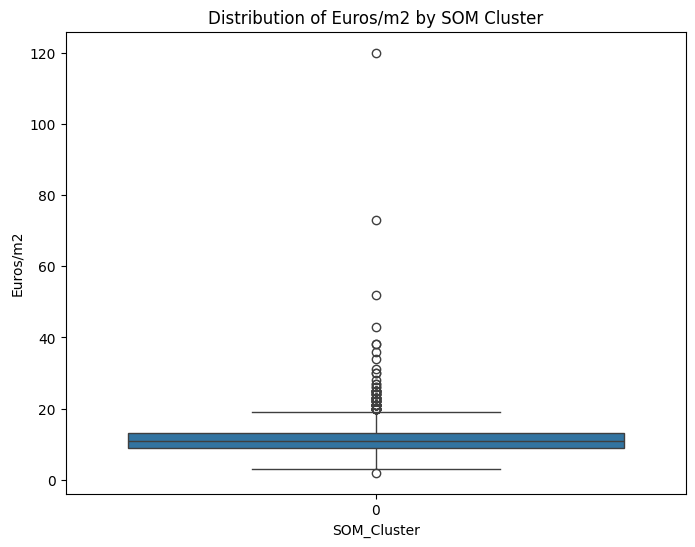

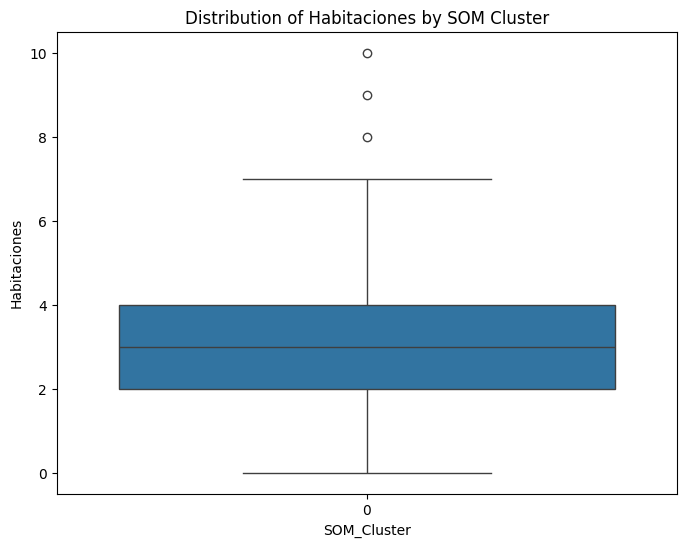

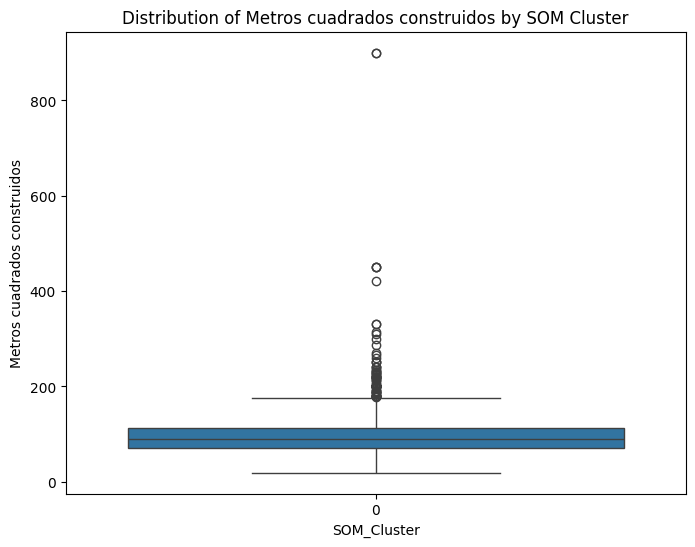

In [ ]:
!pip install minisom pandas numpy seaborn matplotlib folium branca

import pandas as pd
import numpy as np
from minisom import MiniSom
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm

# ... (your existing data loading, preprocessing, and SOM training code) ...

# ------------------------------------------------------------------
# Enhanced Visualizations and Analysis based on SOM Clusters
# ------------------------------------------------------------------

# 1. Visualizing cluster properties on a map (using Folium)

# a. Ensure 'Precio' is numeric
df['Precio_numeric'] = pd.to_numeric(df['Precio'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

# b. Define latitude and longitude columns (adjust if needed)
lat_col, lon_col = 'Latitud', 'Longitud'

# c. Filter valid data points for mapping
valid_data = df.dropna(subset=[lat_col, lon_col, 'Precio_numeric'])

# d. Create a colormap for the clusters
num_clusters = len(df['SOM_Cluster'].unique())
colormap = cm.LinearColormap(colors=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'black', 'cyan'], vmin=0, vmax=num_clusters - 1)

# e. Create the map centered on a location (e.g., Granada)
m = folium.Map(location=[37.1773, -3.5986], zoom_start=11)

# f. Add markers to the map with cluster colors
for _, row in valid_data.iterrows():
    lat = float(str(row[lat_col]).replace(',', '.'))  # Convert to float
    lon = float(str(row[lon_col]).replace(',', '.'))  # Convert to float
    cluster = row['SOM_Cluster']
    price = row['Precio_numeric']

    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=colormap(cluster),
        fill=True,
        fill_color=colormap(cluster),
        fill_opacity=0.7,
        popup=f"Cluster: {cluster}\nPrecio: {price:.0f}€"
    ).add_to(m)

# g. Add colormap legend to the map
m.add_child(colormap)

# h. Display the map
m


# 2. Analyzing feature distributions within clusters (using box plots)

# a. Select features for analysis
features_to_analyze = ['Precio', 'Euros/m2', 'Habitaciones', 'Metros cuadrados construidos']

# b. Create box plots for each feature, grouped by cluster
for feature in features_to_analyze:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='SOM_Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by SOM Cluster')
    plt.show()

In [ ]:
# 1️⃣ Convertir 'Precio' y 'Euros/m2' a valores numéricos
df['Precio_numeric'] = df['Precio'].astype(str) \
    .str.replace(r'[^0-9.]', '', regex=True) \
    .astype(float)
df['Euros_m2_numeric'] = pd.to_numeric(df['Euros/m2'], errors='coerce')

# 2️⃣ Define las columnas de coordenadas (ajusta según tu CSV)
lat_col, lon_col = 'Latitud', 'Longitud'
if lat_col not in df.columns or lon_col not in df.columns:
    raise KeyError(f"Columnas '{lat_col}' o '{lon_col}' no encontradas. Revisa los nombres en tu CSV.")

# 3️⃣ Filtrar filas válidas y muestrear
valid = df.dropna(subset=[lat_col, lon_col, 'Precio_numeric'])
sample = valid.sample(n=min(len(valid), 500), random_state=42)

# 4️⃣ Crear un colormap lineal de Viridis entre los valores mínimo y máximo de precio
# Check if sample is empty
if sample.empty:
    print("Sample DataFrame is empty. Cannot create colormap.")
else:
    min_price = sample['Precio_numeric'].min()
    max_price = sample['Precio_numeric'].max()
    # Use branca.colormap.LinearColormap instead of cm.linear.Viridis
    colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)
    colormap.caption = 'Precio (€)'

    # 5️⃣ Crear el mapa centrado en Granada
    m = folium.Map(location=[37.1773, -3.5986], zoom_start=11)

    # 6️⃣ Añadir marcadores circulares
    for _, row in sample.iterrows():
        price = row['Precio_numeric']
        hex_color = colormap(price)

        # Convert latitude and longitude to floats with '.' as decimal separator
        lat = float(str(row[lat_col]).replace(',', '.'))
        lon = float(str(row[lon_col]).replace(',', '.'))

        folium.CircleMarker(
            location=[lat, lon], # Use the converted lat and lon
            radius=5,
            color=hex_color,
            fill=True,
            fill_color=hex_color,
            fill_opacity=0.7,
            popup=f"Precio: {price:.0f}€\n€/m²: {row['Euros_m2_numeric']:.2f}"
        ).add_to(m)

    # 7️⃣ Añadir la leyenda de color (colormap)
    m.add_child(colormap)

    # 8️⃣ Mostrar el mapa interactivo
    m

In [ ]:
# 1️⃣ Convertir 'Precio' y 'Euros/m2' a valores numéricos
df['Precio_numeric'] = df['Precio'].astype(str) \
    .str.replace(r'[^0-9.]', '', regex=True) \
    .astype(float)
df['Euros_m2_numeric'] = pd.to_numeric(df['Euros/m2'], errors='coerce')

# 2️⃣ Define las columnas de coordenadas (ajusta según tu CSV)
lat_col, lon_col = 'Latitud', 'Longitud'
if lat_col not in df.columns or lon_col not in df.columns:
    raise KeyError(f"Columnas '{lat_col}' o '{lon_col}' no encontradas. Revisa los nombres en tu CSV.")

# 3️⃣ Filtrar filas válidas y muestrear
valid = df.dropna(subset=[lat_col, lon_col, 'Precio_numeric'])
sample = valid.sample(n=min(len(valid), 500), random_state=42)

# 4️⃣ Crear un colormap lineal de Viridis entre los valores mínimo y máximo de precio
# Check if sample is empty
if sample.empty:
    print("Sample DataFrame is empty. Cannot create colormap.")
else:
    min_price = sample['Precio_numeric'].min()
    max_price = sample['Precio_numeric'].max()
    # Use branca.colormap.LinearColormap instead of cm.linear.Viridis
    colormap = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)
    colormap.caption = 'Precio (€)'

    # 5️⃣ Crear el mapa centrado en Granada
    m = folium.Map(location=[37.1773, -3.5986], zoom_start=11)

    # 6️⃣ Añadir marcadores circulares
    for _, row in sample.iterrows():
        price = row['Precio_numeric']
        hex_color = colormap(price)

        # Convert latitude and longitude to floats with '.' as decimal separator
        lat = float(str(row[lat_col]).replace(',', '.'))
        lon = float(str(row[lon_col]).replace(',', '.'))

        folium.CircleMarker(
            location=[lat, lon], # Use the converted lat and lon
            radius=5,
            color=hex_color,
            fill=True,
            fill_color=hex_color,
            fill_opacity=0.7,
            popup=f"Precio: {price:.0f}€\n€/m²: {row['Euros_m2_numeric']:.2f}"
        ).add_to(m)

    # 7️⃣ Añadir la leyenda de color (colormap)
    m.add_child(colormap)

    # 8️⃣ Mostrar el mapa interactivo
    m

In [ ]:
m

In [ ]:
import pandas as pd
import folium
import branca.colormap as cm

# 1️⃣ Convertir 'Precio' y 'Euros/m2' a valores numéricos
df['Precio_numeric'] = df['Precio'].astype(str) \
    .str.replace(r'[^0-9.]', '', regex=True) \
    .astype(float)
df['Euros_m2_numeric'] = pd.to_numeric(df['Euros/m2'], errors='coerce')

# 2️⃣ Define las columnas de coordenadas (ajusta según tu CSV)
lat_col, lon_col = 'Latitud', 'Longitud'
if lat_col not in df.columns or lon_col not in df.columns:
    raise KeyError(f"Columnas '{lat_col}' o '{lon_col}' no encontradas. Revisa los nombres en tu CSV.")

# 3️⃣ Filtrar filas válidas y muestrear, excluyendo outliers
valid = df[(df['Precio_numeric'] <= 3000) & (df['Euros_m2_numeric'] <= 100)] # <-- Added outlier exclusion here
valid = valid.dropna(subset=[lat_col, lon_col, 'Precio_numeric', 'Euros_m2_numeric'])
sample = valid.sample(n=min(len(valid), 500), random_state=42)

# 4️⃣ Crear colormaps para Precio y Euros/m2
if sample.empty:
    print("Sample DataFrame is empty. Cannot create colormap.")
else:
    # Colormap para Precio
    min_price = sample['Precio_numeric'].min()
    max_price = sample['Precio_numeric'].max()
    colormap_precio = cm.LinearColormap(['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)
    colormap_precio.caption = 'Precio (€)'

    # Colormap para Euros/m2
    min_euros_m2 = sample['Euros_m2_numeric'].min()
    max_euros_m2 = sample['Euros_m2_numeric'].max()
    colormap_euros_m2 = cm.LinearColormap(['blue', 'cyan', 'magenta'], vmin=min_euros_m2, vmax=max_euros_m2)
    colormap_euros_m2.caption = 'Euros/m2 (€)'

    # 5️⃣ Crear mapas centrados en Granada
    mapa_precio = folium.Map(location=[37.1773, -3.5986], zoom_start=11)
    mapa_euros_m2 = folium.Map(location=[37.1773, -3.5986], zoom_start=11)

    # 6️⃣ Añadir marcadores circulares a cada mapa
    for _, row in sample.iterrows():
        lat = float(str(row[lat_col]).replace(',', '.'))
        lon = float(str(row[lon_col]).replace(',', '.'))

        # Marcador para Precio
        price = row['Precio_numeric']
        hex_color_precio = colormap_precio(price)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=hex_color_precio,
            fill=True,
            fill_color=hex_color_precio,
            fill_opacity=0.7,
            popup=f"Precio: {price:.0f}€\n€/m²: {row['Euros_m2_numeric']:.2f}"
        ).add_to(mapa_precio)

        # Marcador para Euros/m2
        euros_m2 = row['Euros_m2_numeric']
        hex_color_euros_m2 = colormap_euros_m2(euros_m2)
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color=hex_color_euros_m2,
            fill=True,
            fill_color=hex_color_euros_m2,
            fill_opacity=0.7,
            popup=f"Precio: {price:.0f}€\n€/m²: {euros_m2:.2f}"
        ).add_to(mapa_euros_m2)

    # 7️⃣ Añadir leyendas de color a cada mapa
    mapa_precio.add_child(colormap_precio)
    mapa_euros_m2.add_child(colormap_euros_m2)

    # 8️⃣ Mostrar los mapas interactivos
    mapa_precio  # Muestra el mapa de Precio
    mapa_euros_m2  # Muestra el mapa de Euros/m2
    mapa_precio.save('mapa_precio.html')
    mapa_euros_m2.save('mapa_euros_m2.html')

In [ ]:
mapa_precio

In [ ]:
mapa_euros_m2

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




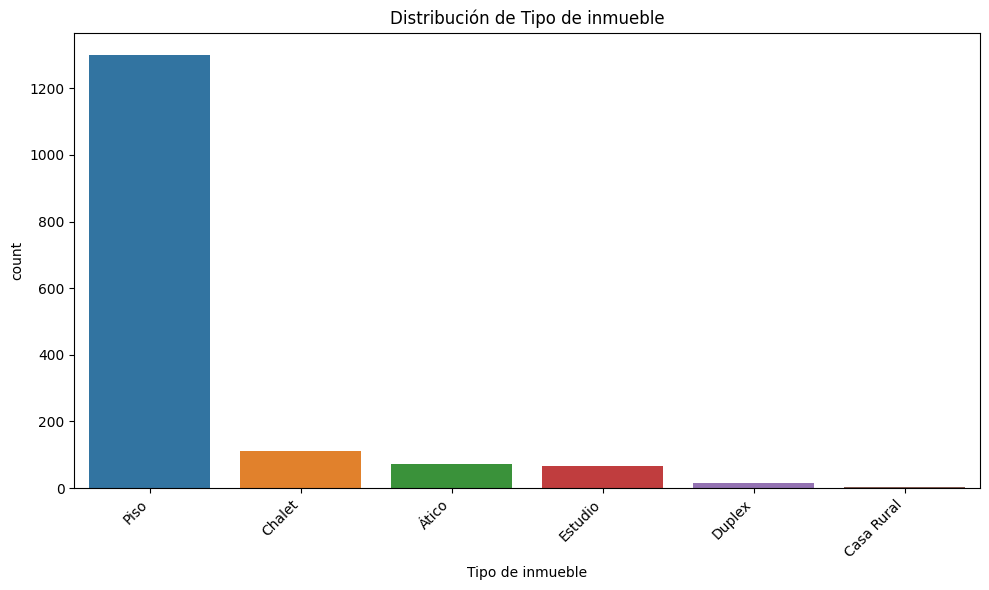

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




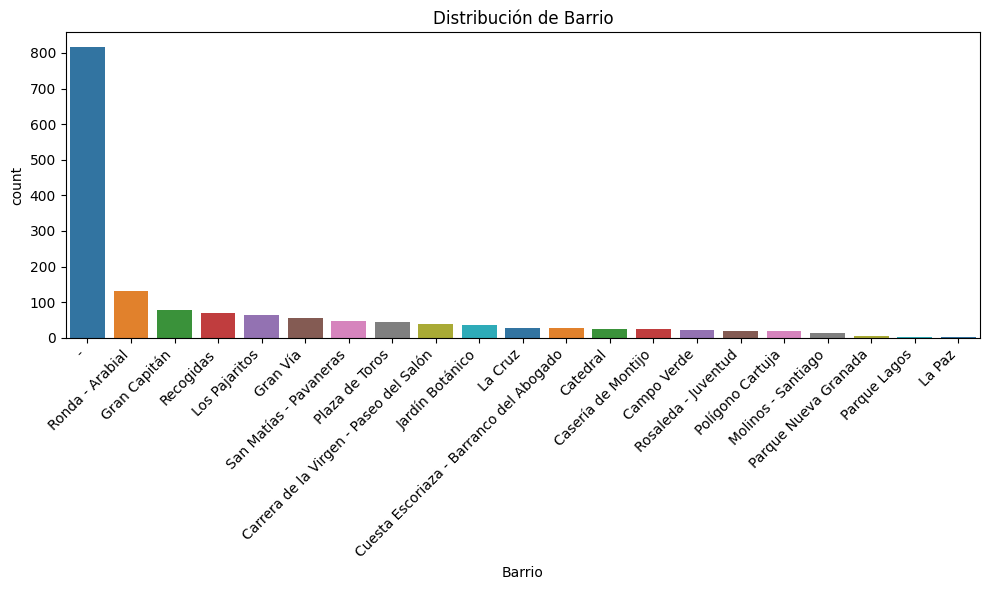

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




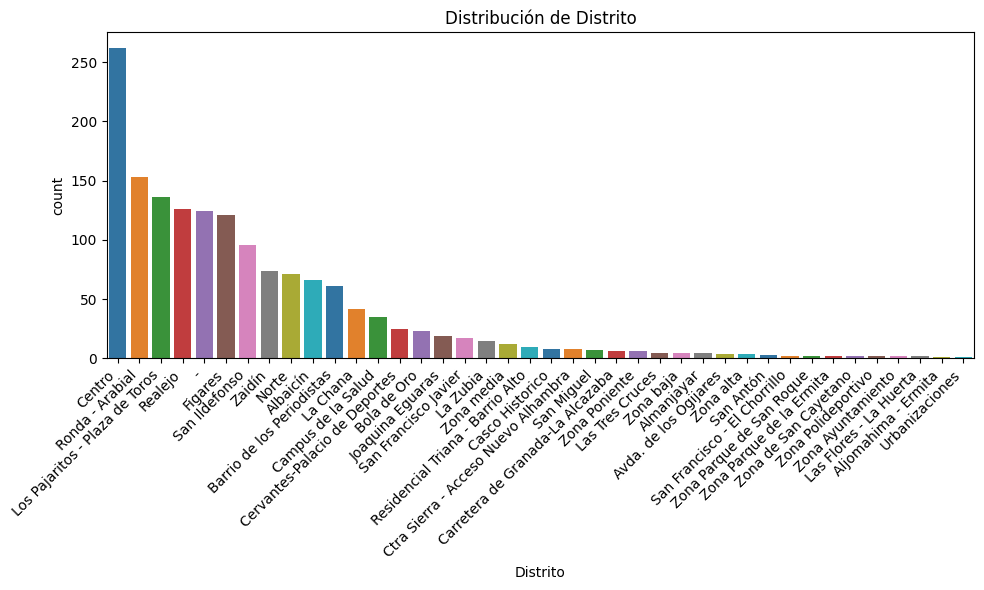

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




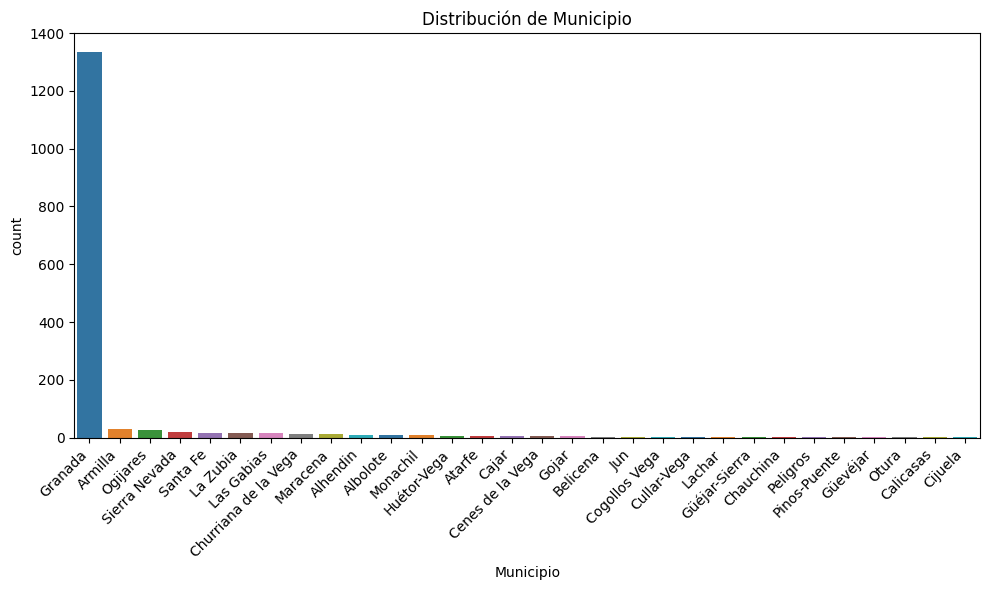

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




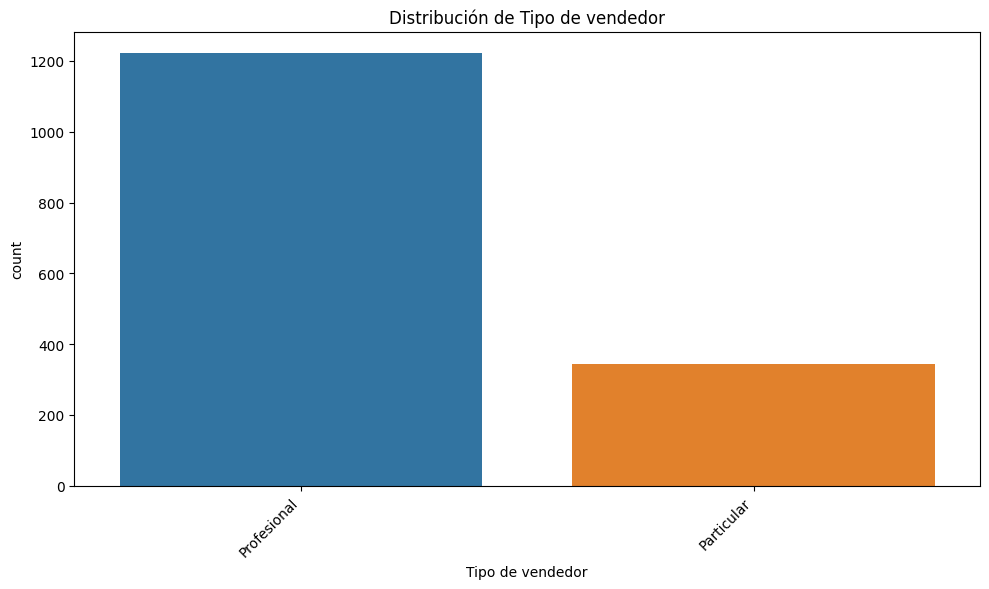

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




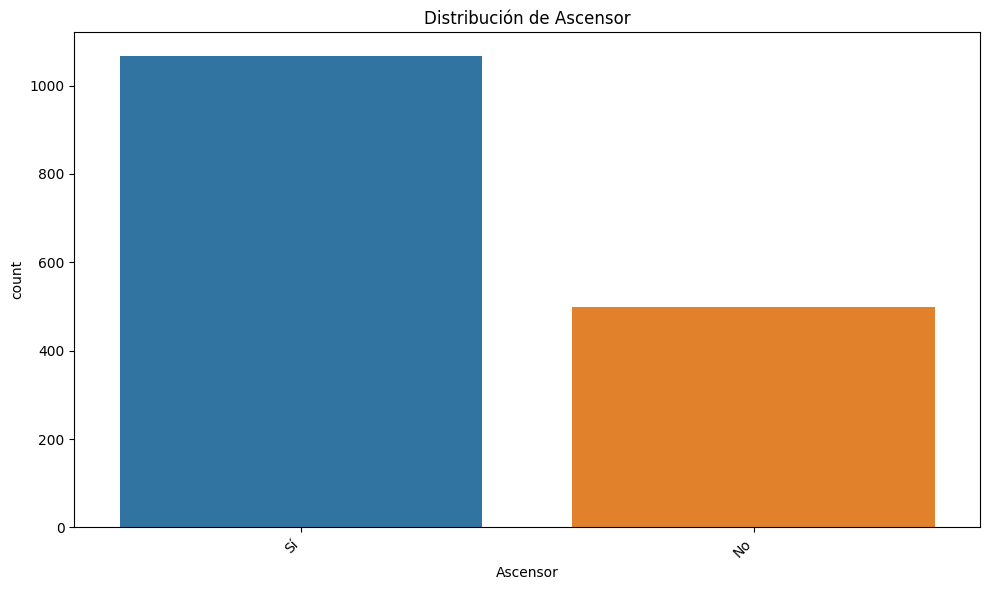

<ipython-input-41-0714e3972b3d>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




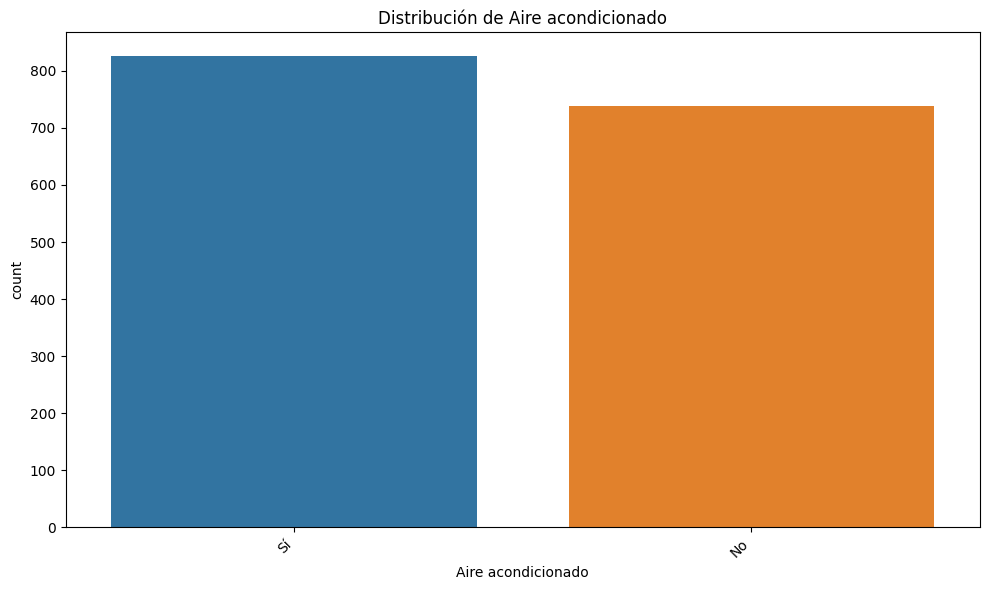

Medias de las variables numéricas:
 - Euros/m2: 11.27
 - Habitaciones: 2.65
 - Metros cuadrados construidos: 96.88
 - Baños: 1.47

Estadísticas de la variación porcentual entre Precio y Precio antes de rebaja:


count    62.000000
mean      8.770938
std       6.132989
min       5.000000
25%       5.882353
50%       7.142857
75%       9.523810
max      50.000000
Name: Variación (%), dtype: float64

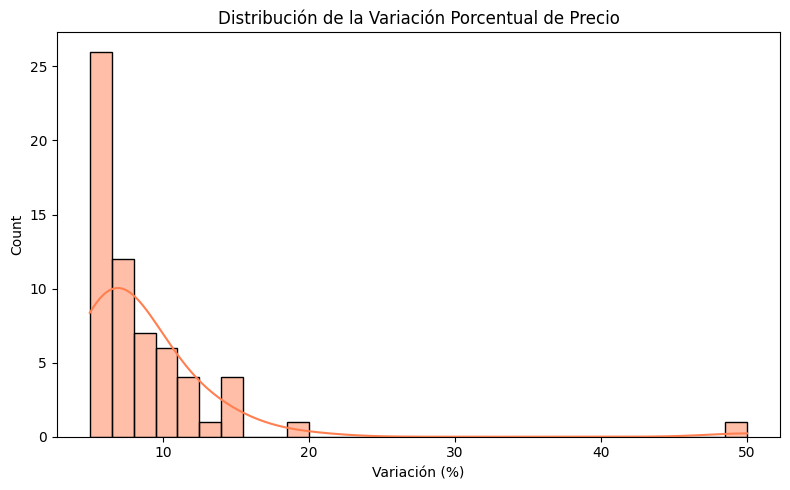


Top 10 viviendas con mayor variación porcentual:


Descripción  \
261   Mayo-Octubre ( Solo Verano ) NO INVIERNO! SOLO...   
310   AMPLIO Y COMODO PISO EN ALQUILER DE 4 DORMITOR...   
573   ¡Bienvenido a este impresionante local reconve...   
872   Alquiler de piso Amueblado en Excelente Ubicac...   
432   Se alquila acogedor piso en planta baja Este a...   
1514  Apartamento amueblado con aparcamiento de 2 do...   
17    ¡Descubre tu nuevo hogar en el corazón de Gran...   
219   ✨ ¿Buscas un apartamento acogedor, bien ubicad...   
1054  ¡PRECIOSO ESTUDIO EN ZONA GRAN VIA! Reformado ...   
1072  ¡PRECIOSO ESTUDIO EN ZONA GRAN VIA! Reformado ...   

      Precio antes de rebaja  Precio  Variación (%)  
261                   1000.0     500      50.000000  
310                   1120.0     900      19.642857  
573                   1300.0    1100      15.384615  
872                   1000.0     850      15.000000  
432                    700.0     600      14.285714  
1514                  1400.0    1200      14.285714  
17                     800.0     700      12.500000  
219                    850.0     750      11.764706  
1054                   595.0     525      11.764706  
1072                   595.0     525      11.764706

In [ ]:
# Instalación de bibliotecas necesarias
!pip install pandas seaborn matplotlib

# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# 2️⃣ Preprocesamiento numérico
# Convertir texto a valores numéricos
df['Precio'] = pd.to_numeric(df['Precio'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df['Precio antes de rebaja'] = pd.to_numeric(df['Precio antes de rebaja'].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df['Euros/m2'] = pd.to_numeric(df['Euros/m2'], errors='coerce')
df['Habitaciones'] = pd.to_numeric(df['Habitaciones'], errors='coerce')
df['Metros cuadrados construidos'] = pd.to_numeric(df['Metros cuadrados construidos'], errors='coerce')
df['Baños'] = pd.to_numeric(df['Baños'], errors='coerce')

# Estandarizar valores de Sí/No
df['Ascensor'] = df['Ascensor (Sí/No)'].map({'Sí':'Sí','No':'No'}).fillna('No')
df['Aire acondicionado'] = df['Aire acondicionado (Sí/No)'].map({'Sí':'Sí','No':'No'}).fillna('No')

# 3️⃣ Gráficos de variables categóricas
cat_cols = [
    'Tipo de inmueble',
    'Barrio',
    'Distrito',
    'Municipio',
    'Tipo de vendedor',
    'Ascensor',
    'Aire acondicionado'
]

for col in cat_cols:
    plt.figure(figsize=(10,6))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='tab10')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

# 4️⃣ Media de variables numéricas (solo métricas, sin representación gráfica)
num_cols = ['Euros/m2', 'Habitaciones', 'Metros cuadrados construidos', 'Baños']
means = df[num_cols].mean()

print("Medias de las variables numéricas:")
for col, value in means.items():
    print(f" - {col}: {value:.2f}")

# 5️⃣ Indicador de variación porcentual (solo donde hay rebaja)
mask = df['Precio antes de rebaja'] > df['Precio']
df_disc = df[mask].copy()
df_disc['Variación (%)'] = (
    (df_disc['Precio antes de rebaja'] - df_disc['Precio'])
    / df_disc['Precio antes de rebaja']
) * 100

# Estadísticas de variación
print("\nEstadísticas de la variación porcentual entre Precio y Precio antes de rebaja:")
display(df_disc['Variación (%)'].describe())

# Histograma de variación porcentual
plt.figure(figsize=(8,5))
sns.histplot(df_disc['Variación (%)'], bins=30, kde=True, color='coral')
plt.xlabel('Variación (%)')
plt.title('Distribución de la Variación Porcentual de Precio')
plt.tight_layout()
plt.show()

# Tabla con ejemplos de mayor descuento
print("\nTop 10 viviendas con mayor variación porcentual:")
display(df_disc.nlargest(10, 'Variación (%)')[[
    'Descripción','Precio antes de rebaja','Precio','Variación (%)'
]])
